In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import pandas as pd
from matplotlib import rcParams,font_manager
from matplotlib.colors import ListedColormap

from fourinarowfunctions import *

datadir = "../data/"

In [2]:
#name of your data file
filename = datadir + 'trialdata.csv'
data_dict = load_data(filename, False)
parsed_dict = {}
for username, data in data_dict.items():
    try:
        parsed_dict[username] = get_parsed_data(data)
    except AssertionError as e:
        continue
usernames = parsed_dict.keys()
print(f"{len(usernames)} users with complete data")

119 users with complete data


In [3]:
rcParams['font.family'] = "sans-serif" 
rcParams['font.weight'] = "roman" 
rcParams['font.style'] = "normal" # not 100% sure what this does but it was recommended
rcParams['font.size'] = 32 # not 100% sure what this does but it was recommended
rcParams['pdf.fonttype'] = 42
rcParams['axes.linewidth'] = 2 #thickness of the border
rcParams['xtick.major.width'] = rcParams['axes.linewidth'] # make sure line widths are consistent
rcParams['ytick.major.width'] = rcParams['axes.linewidth']
rcParams['axes.spines.right'] = False #hides right border
rcParams['axes.spines.top'] = False #hides top
rcParams['legend.frameon'] = False #hides box around the legend
rcParams['legend.fontsize'] = 18 #font size in pt
rcParams['axes.labelsize'] = 32 
rcParams['xtick.labelsize'] = 24
rcParams['ytick.labelsize'] = rcParams['xtick.labelsize']
rcParams['lines.linewidth'] = 3
rcParams['xtick.major.size'] = 5
rcParams['lines.markersize'] = 16
rcParams['ytick.major.size'] = rcParams['xtick.major.size']

username2studyid = {username: username.split(":")[0] for username in usernames}
username2psiturkid = {username: username.split(":")[1] for username in usernames}

Users that have the same StudyID

Should be empty

In [4]:
duplicates = pd.DataFrame(username2studyid.items(), columns=["username", "StudyID"])
duplicates[duplicates["StudyID"].duplicated(keep=False)]

,username,StudyID
85,866:R_1gV06gSb8WYiLyG,866
97,866:R_31YEgt5MqfcfZMC,866


In [5]:
age = pd.read_csv(datadir + "SubjectAge.csv")
pwm = pd.read_csv(datadir + "params_with_metrics.csv")
dur = pd.read_csv(datadir + "gameDurations.csv")
rts = pd.read_csv(datadir + "reactiontimes.csv")

bins = [7, 12, 18, 24]
ageBinrNr2Value = {0: 10, 1: 15, 2:21}
age['ageBin'] = pd.cut(age['FlooredAge'], bins)
age['ageBinNr'] = age['ageBin'].cat.codes
age['ageBinValue'] = age.apply(lambda row: ageBinrNr2Value.get(row['ageBinNr'], 0), axis = 1)
dur["MainDurationMinutes"] = pd.to_numeric(dur["MainDurationSeconds"]) / 60
dur["TotalDurationMinutes"] = pd.to_numeric(dur["TotalDurationSeconds"], errors='coerce') / 60
dur["StudyID"] = dur["User"].apply(lambda x: username2studyid[x])
rts["TotalMoves"] = rts["UserMoves"] + rts["OpponentMoves"]
rts["StudyID"] = rts["User"].apply(lambda x: username2studyid[x])
raw_metrics = pwm.loc[:,("subject", "fold", "planning depth", "feature drop rate", "heuristic quality", "elo")]
raw_metrics["StudyID"] = raw_metrics["subject"].apply(lambda x: username2studyid[x])
raw_metrics = pd.merge(raw_metrics, age, on="StudyID", how="left")
metrics = raw_metrics.dropna()
dropped_nans = raw_metrics[~raw_metrics.index.isin(metrics.index)]
print(f"Dropped rows with nans: {len(dropped_nans)}")
dropped_nans

Dropped rows with nans: 35


,subject,fold,planning depth,feature drop rate,heuristic quality,elo,StudyID,Gender,ExactAge,FlooredAge,ageBin,ageBinNr,ageBinValue
415,A1052:R_787p5urRmH36oyR,1,2.269210,0.27620,0.592105,237,A1052,M,25.6466,25,NaN,-1,0
416,A1052:R_787p5urRmH36oyR,2,3.783980,0.31454,0.498218,237,A1052,M,25.6466,25,NaN,-1,0
417,A1052:R_787p5urRmH36oyR,3,0.011930,0.21882,0.560605,237,A1052,M,25.6466,25,NaN,-1,0
418,A1052:R_787p5urRmH36oyR,4,1.555330,0.26472,0.482964,237,A1052,M,25.6466,25,NaN,-1,0
419,A1052:R_787p5urRmH36oyR,5,7.322550,0.40299,0.553365,237,A1052,M,25.6466,25,NaN,-1,0
470,A1153:R_1CwnNA5xXOlHq5l,1,0.001350,0.42843,0.307945,-102,A1153,M,27.0247,27,NaN,-1,0
471,A1153:R_1CwnNA5xXOlHq5l,2,6.111260,0.49237,0.326705,-102,A1153,M,27.0247,27,NaN,-1,0
472,A1153:R_1CwnNA5xXOlHq5l,3,0.000328,0.55850,0.455312,-102,A1153,M,27.0247,27,NaN,-1,0
473,A1153:R_1CwnNA5xXOlHq5l,4,0.010306,0.53082,0.232842,-102,A1153,M,27.0247,27,NaN,-1,0
474,A1153:R_1CwnNA5xXOlHq5l,5,0.000036,0.60646,0.215511,-102,A1153,M,27.0247,27,NaN,-1,0


In [6]:
age_colors = ['#7DE3AC', '#129951','#20382B']
age_labels = ["8 to 12","13 to 17","18 to 24"]

rcParams['figure.figsize'] = (8,6) #figure size in inches

def set_labels(ax, title, reposition_ticks = True):
    ax.set_xlabel("Age")
    ax.set_ylabel(title)
    labels = age_labels.copy()
    if reposition_ticks:
        ax.set_xticks(list(ageBinrNr2Value.values()))
    ax.set_xticklabels(labels)
    ax.legend([])
    return ax

def plot_with_errorbars(col, title, df = None):
    if not isinstance(df, pd.DataFrame):
        df = metrics.groupby("subject").mean().reset_index()
    ax = df.groupby("ageBinValue")[col].aggregate(['mean', 'sem']).plot(yerr="sem", color='k')
    size = 20
    df.plot.scatter('ExactAge', col, size, [age_colors[int(binNr)] for binNr in df['ageBinNr']], ax=ax)
    size = 300
    df.groupby("ageBinValue")[col].aggregate(['mean']).reset_index().plot.scatter('ageBinValue', 'mean', size, age_colors, ax=ax)
    print(f"{len(df.dropna(subset=[col]))} rows used in this graph")
    set_labels(ax, title)

112 rows used in this graph


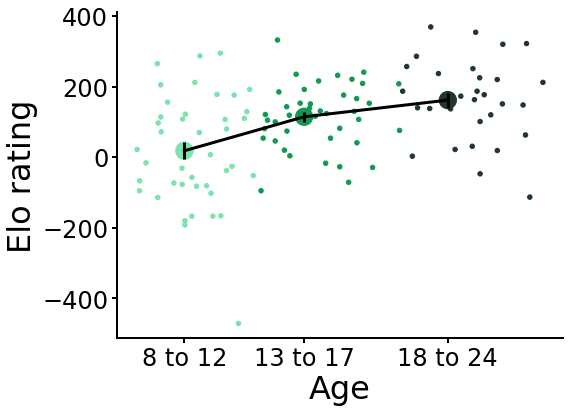

In [7]:
plot_with_errorbars("elo", "Elo rating")

112 rows used in this graph


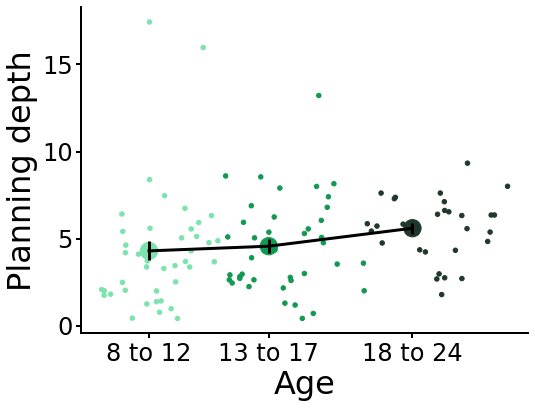

In [8]:
plot_with_errorbars("planning depth", "Planning depth")

112 rows used in this graph


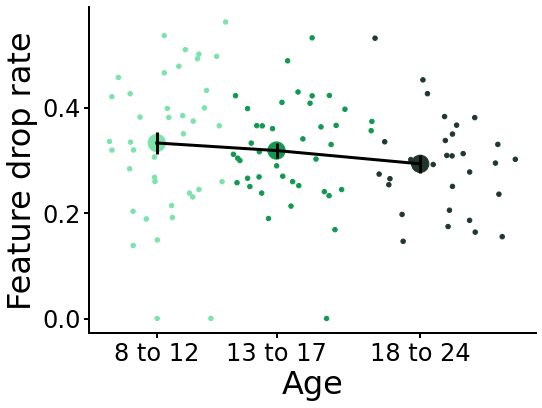

In [9]:
plot_with_errorbars("feature drop rate", "Feature drop rate")

112 rows used in this graph


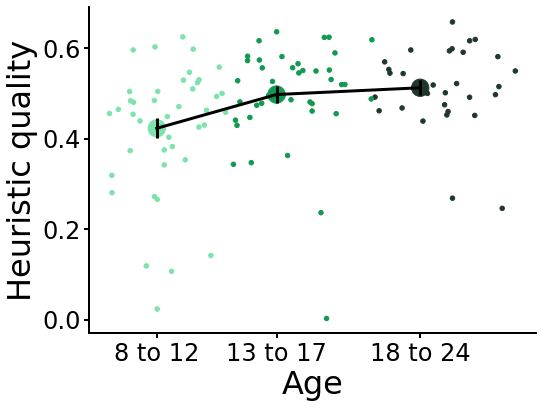

In [10]:
plot_with_errorbars("heuristic quality", "Heuristic quality")

In [11]:
durage = pd.merge(dur, age, how="left", on="StudyID")
print(f"Subjects in data: {len(durage)}")
# only include subjects listed in the first cell
durage = durage[durage["User"].isin(usernames)]
print(f"Subjects after selection: {len(durage)}")
# Remove duplicate subjects. Duplicates creep in if on or both of params_with_metrics or the age csv's contains duplicates
durage = durage.drop_duplicates(subset=["User"], keep="first")
print(f"Subjects after filtering duplicates: {len(durage)}")
# Drop subjects for which no age was available. Check that you have the expected number of subjects left!
durage = durage.dropna(subset=["ageBin"])
print(f"Subjects with age bin: {len(durage)}")

Subjects in data: 119
Subjects after selection: 119
Subjects after filtering duplicates: 119
Subjects with age bin: 112


In [12]:
rcParams['figure.figsize'] = (6,6) #figure size in inches

def plot_freq(col, title):
    plotdata = durage.groupby("ageBin")[col].aggregate(['mean', 'sem'])
    ax = plotdata.plot(kind="bar", yerr="sem", color=[age_colors])
    set_labels(ax, title, False).tick_params("x", labelrotation=0)

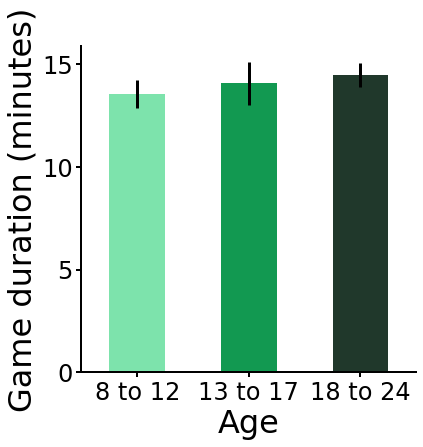

In [13]:
plot_freq("MainDurationMinutes", "Game duration (minutes)")

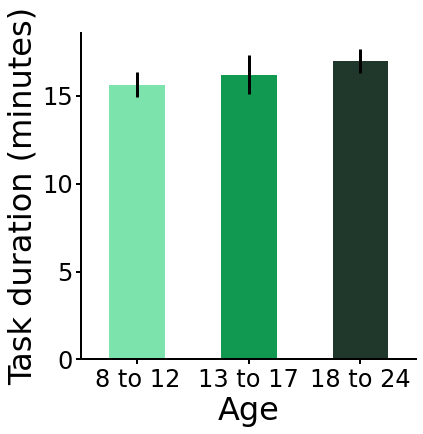

In [14]:
plot_freq("TotalDurationMinutes", "Task duration (minutes)")

In [15]:
plotdata = pd.merge(rts, age, on="StudyID", how="left")[["User", "GameNr", "TotalMoves", "ageBinNr"]].drop_duplicates()
plotdata = plotdata[plotdata["ageBinNr"] >= 0]
plotdata["count"] = 1
plotdata = plotdata.groupby(["ageBinNr", "TotalMoves"])["count"].sum().reset_index().pivot(index="TotalMoves",columns="ageBinNr").fillna(0)
plotdata.loc[37] = 0 # Add an empty value at the end (36 moves is a full board)
plotdata = plotdata.sort_index()

subsPerBin = metrics[["subject", "ageBinNr"]].drop_duplicates().groupby("ageBinNr").count()
for binNr in range(len(bins) - 1):
    plotdata.iloc[:,binNr] = plotdata.iloc[:,binNr] / subsPerBin.iloc[binNr,0]

plotdata

count                    
ageBinNr           0         1         2
TotalMoves                              
6           0.000000  0.000000  0.033333
7           7.804878  7.219512  6.700000
8           4.390244  4.487805  4.066667
9           2.390244  2.804878  2.633333
10          1.951220  2.463415  1.900000
11          2.585366  3.000000  3.666667
12          1.585366  2.170732  2.500000
13          1.829268  2.195122  2.300000
14          1.975610  1.536585  1.900000
15          1.829268  1.585366  1.166667
16          1.121951  1.292683  0.933333
17          1.219512  1.268293  1.166667
18          0.926829  0.634146  1.133333
19          0.756098  0.707317  0.433333
20          0.536585  0.560976  0.700000
21          0.390244  0.439024  0.566667
22          0.365854  0.365854  0.500000
23          0.463415  0.243902  0.366667
24          0.317073  0.243902  0.266667
25          0.414634  0.317073  0.266667
26          0.146341  0.146341  0.100000
27          0.292683  0.073171  0.200000
28          0.121951  0.048780  0.166667
29          0.195122  0.121951  0.100000
30          0.170732  0.024390  0.000000
32          0.073171  0.048780  0.133333
33          0.073171  0.024390  0.000000
34          0.097561  0.000000  0.033333
35          0.024390  0.000000  0.033333
36          0.951220  0.926829  1.000000
37          0.000000  0.000000  0.000000

Text(0, 0.5, 'Average frequency')

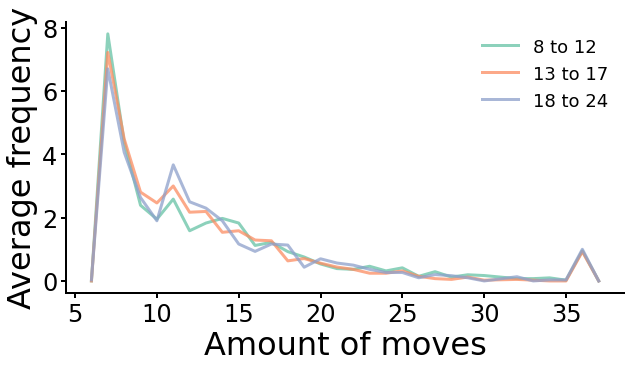

In [16]:
ax = plotdata.plot(color=["#66C2A5C0", "#FC8D62C0", "#8DA0CBC0"], figsize=(10, 5))
ax.legend(age_labels)
ax.set_xlabel("Amount of moves")
ax.set_ylabel("Average frequency")